In [30]:
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import matplotlib.pyplot as plt
import csv
import os
import time
import datetime
#import iso8601
import scipy as stats
import arrow
from citipy import citipy

In [31]:
# Lists for holding Us Geological Survey (USGS) json data
mag_data = []
place_data = []
time_data = []
updated_data = []
tz_data = []
url_data = []
detail_data = []
felt_data = []
cdi_data = []
mmi_data = []
alert_data = []
status_data = []
tsunami_data = []
sig_data = []
net_data = []
code_data = []
ids_data = []
sources_data = []
types_data = []
nst_data = []
dmin_data = []
rms_data = []
gap_data = []
magType_data = []
type_data = []
title_data = []
geo_type_data = []
lat_data = []
lng_data = []
coordinates_3_data = []

#calculated lists
converted_date = []
cd_by_month = []
cd_by_year = []

In [32]:
#https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2017-07-14%2000:00:00&endtime=2017-09-21%2023:59:59&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time

start = 1950
start_loop = start

#range should be 14 to retrieve 1950 to present data

for x in range(14):

    url_bit_1 = "https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime="
    year_from_1 = str(start_loop)
    year_from_2= "-01-01"
    year_to = str(int(year_from_1) + 5)
    url_bit_2= "-01-01%0000:00:00&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time"

    # Build partial query URL
    Search = url_bit_1 + year_from_1 + year_from_2  + "%0000:00:01&endtime=" + year_to + url_bit_2
    #Search

    year_range = str(start) + " through " + str(year_to)
    #year_range

    # set response variable
    response = req.get(Search).json()

    # idetify how many seismic events are in our json
    usgs_json_data = json.dumps(response)

    item_dict = json.loads(usgs_json_data)

    json_loops = len(item_dict['features'])

    #append usgs_json_data into list form

    json_counter = 0

    for x in range(json_loops):

        mag_data.append(response["features"][json_counter]["properties"]["mag"])
        place_data.append(response["features"][json_counter]["properties"]["place"])
        time_data.append(response["features"][json_counter]["properties"]["time"])
        updated_data.append(response["features"][json_counter]["properties"]["updated"])
        tz_data.append(response["features"][json_counter]["properties"]["tz"])
        url_data.append(response["features"][json_counter]["properties"]["url"])
        detail_data.append(response["features"][json_counter]["properties"]["detail"])
        felt_data.append(response["features"][json_counter]["properties"]["felt"])
        cdi_data.append(response["features"][json_counter]["properties"]["cdi"])
        mmi_data.append(response["features"][json_counter]["properties"]["mmi"])
        alert_data.append(response["features"][json_counter]["properties"]["alert"])
        status_data.append(response["features"][json_counter]["properties"]["status"])
        tsunami_data.append(response["features"][json_counter]["properties"]["tsunami"])
        sig_data.append(response["features"][json_counter]["properties"]["sig"])
        net_data.append(response["features"][json_counter]["properties"]["net"])
        code_data.append(response["features"][json_counter]["properties"]["code"])
        ids_data.append(response["features"][json_counter]["properties"]["ids"])
        sources_data.append(response["features"][json_counter]["properties"]["sources"])
        types_data.append(response["features"][json_counter]["properties"]["types"])
        nst_data.append(response["features"][json_counter]["properties"]["nst"])
        dmin_data.append(response["features"][json_counter]["properties"]["dmin"])
        rms_data.append(response["features"][json_counter]["properties"]["rms"])
        gap_data.append(response["features"][json_counter]["properties"]["gap"])
        magType_data.append(response["features"][json_counter]["properties"]["magType"])
        type_data.append(response["features"][json_counter]["properties"]["type"])
        title_data.append(response["features"][json_counter]["properties"]["title"])
        geo_type_data.append(response["features"][json_counter]["geometry"]["type"])
        lat_data.append(response["features"][json_counter]["geometry"]["coordinates"][0])
        lng_data.append(response["features"][json_counter]["geometry"]["coordinates"][1])
        coordinates_3_data.append(response["features"][json_counter]["geometry"]["coordinates"][2])
        
        
        # calculated fields
        
        converted_date.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(converted_date)-1])).strftime('%m-%d-%Y'))
        cd_by_month.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1])).strftime('%m-%Y'))
        cd_by_year.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_year)-1])).strftime('%Y'))

        json_counter = json_counter + 1    
        
    start_loop = year_to     

In [33]:
seismic_data = {"mag" : mag_data,
                "place" : place_data,
                "time" : time_data,
                "updated" : updated_data,
                "tz" : tz_data,
                "url" : url_data,
                "detail" : detail_data,
                "felt" : felt_data,
                "cdi" : cdi_data,
                "mmi" : mmi_data,
                "alert" : alert_data,
                "status" : status_data,
                "tsunami" : tsunami_data,
                "sig" : sig_data,
                "net" : net_data,
                "code" : code_data,
                "ids" : ids_data,
                "sources" : sources_data,
                "types" : types_data,
                "nst" : nst_data,
                "dmin" : dmin_data,
                "rms" : rms_data,
                "gap" : gap_data,
                "magType" : magType_data,
                "type" : type_data,
                "title" : title_data,
                "geo_type" : geo_type_data,
                "lat" : lat_data,
                "lng" : lng_data,
                "coordinates_3" : coordinates_3_data,
                
                "converted_date" : converted_date,
                "cd_by_month" : cd_by_month,
                "cd_by_year" : cd_by_year,
               }

seismic_data = pd.DataFrame(seismic_data)

seismic_data


,alert,cd_by_month,cd_by_year,cdi,code,converted_date,coordinates_3,detail,dmin,felt,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,None,12-1954,1954,NaN,3298672,12-31-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.505300,NaN,...,",ci,",reviewed,-473410987250,"M 3.7 - 42km ENE of Bishop, CA",0,earthquake,",origin,phase-data,",NaN,1454005368180,https://earthquake.usgs.gov/earthquakes/eventp...
1,None,12-1954,1954,NaN,3298671,12-31-1954,0.0100,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.194900,NaN,...,",ci,",reviewed,-473536294990,"M 2.9 - 22km ENE of Oildale, CA",0,earthquake,",origin,phase-data,",NaN,1454005367690,https://earthquake.usgs.gov/earthquakes/eventp...
2,None,12-1954,1954,NaN,3298670,12-30-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,",ci,",reviewed,-473556872390,"M 3.6 - 31km SE of Maneadero, B.C., MX",0,earthquake,",origin,phase-data,",NaN,1454004536930,https://earthquake.usgs.gov/earthquakes/eventp...
3,None,12-1954,1954,NaN,3298669,12-30-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.426100,NaN,...,",ci,",reviewed,-473590603370,"M 2.9 - 10km NE of Arvin, CA",0,earthquake,",origin,phase-data,",NaN,1454004277690,https://earthquake.usgs.gov/earthquakes/eventp...
4,None,12-1954,1954,NaN,3298666,12-29-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.780100,NaN,...,",ci,",reviewed,-473746800000,"M 2.8 - 14km NW of Grapevine, CA",0,earthquake,",origin,phase-data,",NaN,1454005105150,https://earthquake.usgs.gov/earthquakes/eventp...
5,None,12-1954,1954,NaN,3298665,12-27-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.314700,NaN,...,",ci,",reviewed,-473819999130,"M 2.8 - 27km SSW of Bodfish, CA",0,earthquake,",origin,phase-data,",NaN,1454004555660,https://earthquake.usgs.gov/earthquakes/eventp...
6,None,12-1954,1954,NaN,3298664,12-26-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.325300,NaN,...,",ci,",reviewed,-473864708560,"M 2.7 - 27km NE of Arvin, CA",0,earthquake,",origin,phase-data,",NaN,1454005121570,https://earthquake.usgs.gov/earthquakes/eventp...
7,None,12-1954,1954,NaN,3298663,12-26-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.364900,NaN,...,",ci,",reviewed,-473884331820,"M 3.1 - 20km NNW of Tehachapi, CA",0,earthquake,",origin,phase-data,",NaN,1454003992040,https://earthquake.usgs.gov/earthquakes/eventp...
8,None,12-1954,1954,NaN,3298662,12-26-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.468000,NaN,...,",ci,",reviewed,-474173253050,"M 3.7 - 20km WNW of Parkfield, CA",0,earthquake,",origin,phase-data,",NaN,1454005367160,https://earthquake.usgs.gov/earthquakes/eventp...
9,None,12-1954,1954,NaN,3298661,12-22-1954,6.0000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.410100,NaN,...,",ci,",reviewed,-474226028310,"M 2.5 - 20km ENE of Arvin, CA",0,earthquake,",origin,phase-data,",NaN,1454004277140,https://earthquake.usgs.gov/earthquakes/eventp...


In [34]:
# final range returned
year_range

'1950 through 2020'

In [35]:
seismic_data.to_csv("seismic_data.csv")

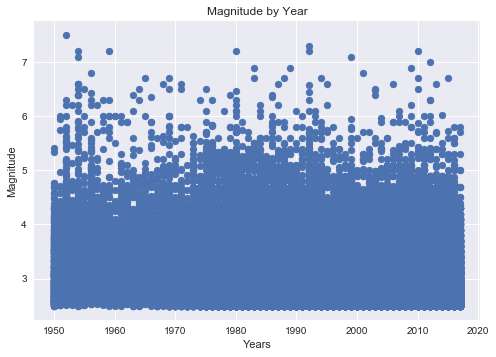

In [36]:
# Build a scatter plot for each data type
plt.scatter(seismic_data["cd_by_year"], seismic_data["mag"], marker="o")

# Incorporate the other graph properties
plt.title("Magnitude by Year") # + " " + date_stamp)
plt.ylabel("Magnitude")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude by Month.png")

# Show plot
plt.show()